In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import spacy
!pip install keybert
from keybert import KeyBERT

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=a16315925e360a9377cb91d06524b81d9bc274e86b4010d9a07cb4038b86b10c
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=0e2a316b9ab74df8413afe8547cbce07d91b887bf4b9d0c11ec82df1d9f969f4
 

In [10]:
# Imports
df = pd.read_csv("./output/cleaned_english_data.csv")
df_ita = pd.read_csv("./output/cleaned_italian_data.csv")

In [11]:
# Useful functions
def create_wordlist(df):
    '''
        Function that creates wordlist from dataframe
    '''
    wordlist = " ".join(df[df.sexist == True].text)

    return wordlist

def lemmatize_text(wordlist, file_input):

    '''
        Function that given a wordlist and an input file on which to lemmatize, return a list of lemmas contained in the wordlist
    '''

    nlp = spacy.load(file_input)
    wordlist = nlp(wordlist)
    lemma_list = " ".join(set([token.lemma_ for token in wordlist]))

    return lemma_list


def keyword_extraction(wordlist, number_kw):

    '''
        Function that runs keybert model and extracts the most important keywords
    '''

    kw_model = KeyBERT()
    extracted_keywords = kw_model.extract_keywords(wordlist, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=number_kw)

    return extracted_keywords

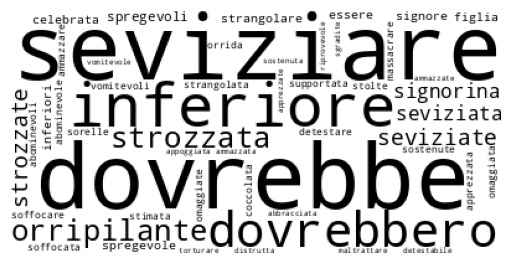

In [12]:
# WORDCLOUD COMPARISON

en_wordlist = create_wordlist(df)

# Lemmatization

en_lemma_list = lemmatize_text(en_wordlist, "en_core_web_sm")

# Keyword extraction
extracted_keywords = keyword_extraction(en_lemma_list, 50)

en_wordlist = " ".join([kw[0] for kw in extracted_keywords])
en_wordcloud = wordcloud.WordCloud(background_color = "white", color_func=lambda *args, **kwargs: "black").generate(en_wordlist)

# Generate plot
plt.imshow(en_wordcloud)
plt.axis("off")
plt.savefig("./output/english_wordcloud.png")


# CREATE ITALIAN WORDCLOUD

# create wordlist
ita_wordlist = create_wordlist(df_ita)

# Keyword extraction
extracted_keywords = keyword_extraction(ita_wordlist, 50)

ita_wordlist = " ".join([kw[0] for kw in extracted_keywords])
ita_wordcloud = wordcloud.WordCloud(background_color = "white", color_func=lambda *args, **kwargs: "black").generate(ita_wordlist)

# Generate plot
plt.imshow(ita_wordcloud)
plt.axis("off")
plt.savefig("./output/italian_wordcloud.png")